# Analysis of District Level Data to Identify Reasons for Student Dropouts

Initial motivation for this project was to correlate the data with the dropout rate using regressional analysis. The data is huge enough to make it successful. But before directly jumping into it, checking the data carefully first was found to be a good idea. The Indian Education system in my opinion isn't so bad. But it isn't so good either. This assumption was mostly based on my own experience and it lacked the understanding of ground truth. Is the situation worse than what I thought? or is it better? We will see in a few moments.  

In [1]:
#initializing libraries and paths
import pandas as pd
import numpy as np
from glob import glob

path1='districtwise/'
path2='statewise-primary/'
path3='statewise-secondary/'

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
map1 = Basemap(projection='merc', lat_0 = 25, lon_0 = 75,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=60.25, llcrnrlat=5.0,
    urcrnrlon=94.25, urcrnrlat=38.75)


In [2]:
#Data is already preprocessed and cleaned into these specific files
g=sorted(glob(path1+'*_*'))

a16=pd.read_csv(g[3])
a15=pd.read_csv(g[2])
a14=pd.read_csv(g[1])
a13=pd.read_csv(g[0])

dists=a16['DISTNAME']
stats=a16[['STATCD','STATNAME']]

The data that is used for this work is from http://udise.in/drc.htm website. The data is district level and it has total 661 districts. Another data that was used was state level data http://udise.in/src.htm. This state level data was used as a support for the district level data. The state level data for secondary schools is available from year 2012 and thus for a fair comparison, 2012 to 2015 data was used from both of these websites.

**Data Corrections:**
1. Telangana State did not exist in some data and thus it was eliminated entirely from the data in the data cleaning process.
2. Some data fields were left blank for some reason and thus the data in those fields is assumed 0.
3. Arunachal Pradesh and Meghalaya had 4 extra districts in some data. For fair comparison, those districts were not taken into consideration as well.
4. Districtwise 2013-14 data has wrong state Id's, used it from 2014-15 data.

**Coordinates of DataPoints:**

A State and District name combination was obtained from the data. The combination is fed into the geocoder library to retrive coordinates of those states from Google API for plotting purposes.


In [3]:
import geocoder
g = geocoder.google(dists[0]+','+stats[0])
lats=[]
longs=[]
for i in range(0,len(dists)):
    g = geocoder.google(dists[i]+','+stats[i])
    lats.append(g.latlng[0])
    longs.append(g.latlng[1])
    
fr1=pd.DataFrame({'lats':lats,'longs':longs})
fr1.to_csv('coords.csv')

In [3]:
fr1=pd.read_csv('coords.csv')
fr1.head()

,Unnamed: 0,lats,longs
0,0,34.431923,74.123996
1,1,34.159515,74.358747
2,2,34.083671,74.797282
3,3,33.934855,74.640043
4,4,33.871612,74.894569


Coordinates were saved to avoid calling the API again and again to avoid the excess API calls

### Locating the districts with the dropouts

The dropout rate for each district was obtained using the following formula

$Dropout rate = {(year_{14}std^{x_{pop}} - year_{15}std^{x+1_{pop}}) \over year_{14}std^{x_{pop}}}$

where $x$ is the grade student enters. The dropout for each grade was calculated and summed up.
The classification of dropouts from no dropouts/increased enrollment to +ve dropouts were obtained

In [4]:
lats=fr1['lats']
longs=fr1['longs']
lat_p=[]
lat_n=[]
lon_p=[]
lon_n=[]

grp=[((a15['C4_G']-a16['C5_G']-a16['C4_GR']))>=0]
for j in range(0,len(grp[0])):
    if grp[0][j] == True:
        lat_p.append(lats[j])
        lon_p.append(longs[j])
    else:
        lat_n.append(lats[j])
        lon_n.append(longs[j])

The obtained Dropout rate were marked in the form of markers in the Indian plot below.

***NOTE: The map used below is showing error/irregularities in the Jammu Kashmir region. I appologise for using this map but I had to use it as it was the only map that was available for this 'basemap' library. I request Indian government to provide a proper map for these developers so this error can be rectified.***

/home/aditya/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/aditya/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/home/aditya/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/aditya/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


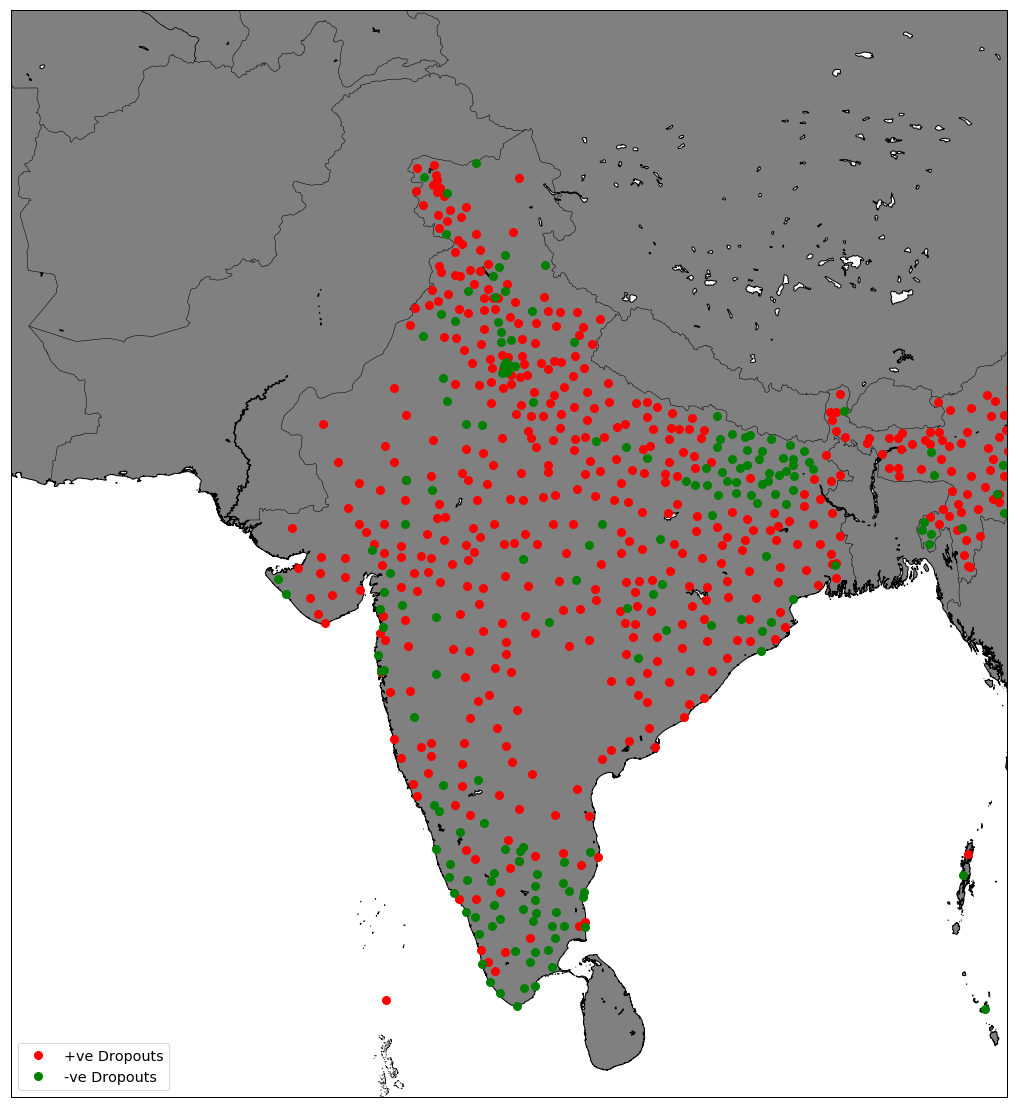

In [5]:
xp,yp = map1(lon_p, lat_p)
xn,yn = map1(lon_n, lat_n)
fig1=plt.figure(figsize=(30,20))
map1.drawcoastlines()
map1.drawcountries()
map1.fillcontinents(color = 'gray')
map1.drawmapboundary()
map1.plot(xp, yp, 'ro', markersize=8,label='+ve Dropouts')
map1.plot(xn, yn, 'go', markersize=8,label='-ve Dropouts')
ax = fig1.gca()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles,labels,fontsize="x-large")
plt.show()

The above map shows the overall dropout rate of girl students. The **green** region suggests that the drop has not occured or even the enrollment has increased. Whereas the **red** region suggests the districts where the students has dropped out.
The similar phenomena can be seen in the plot below which is for the boys student.

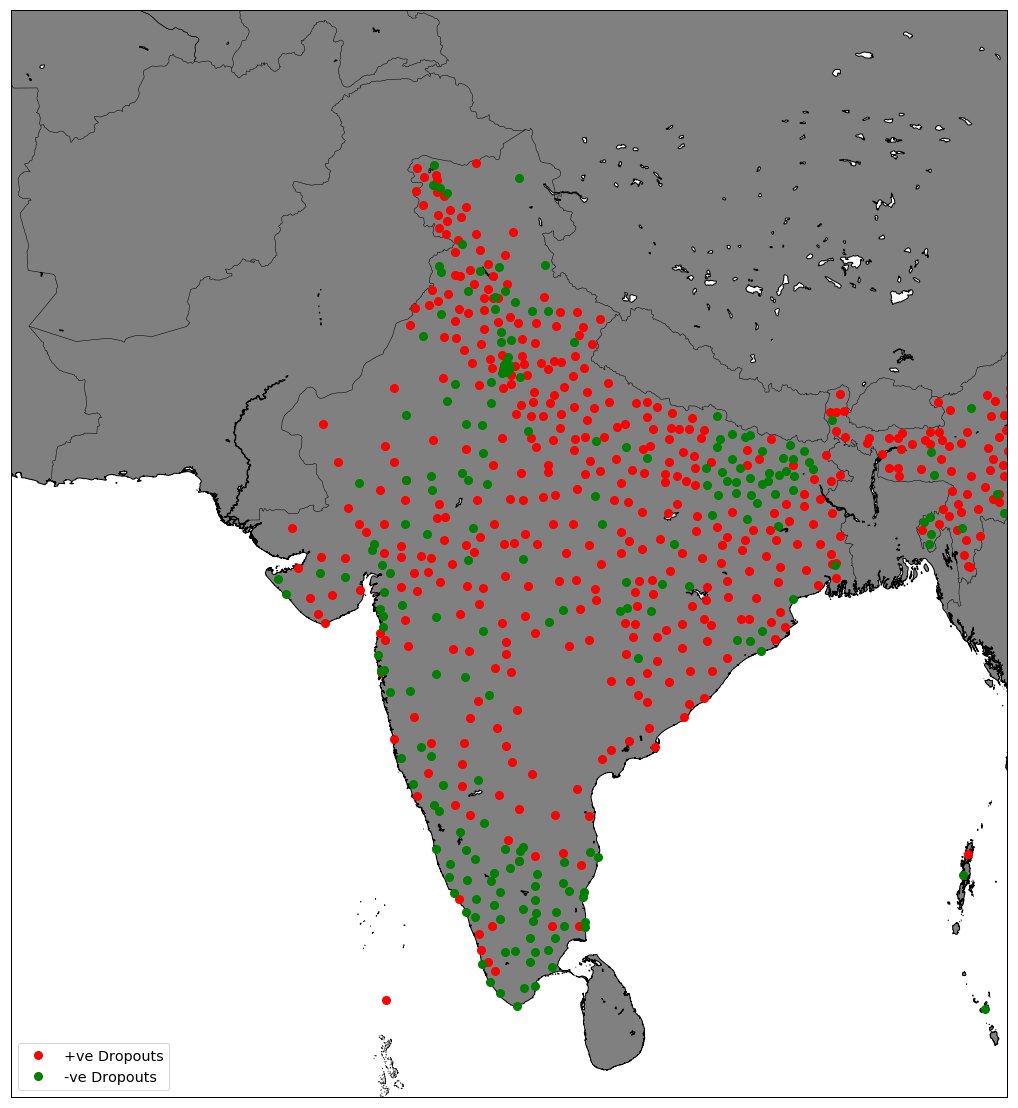

In [7]:
grpb=[((a15['C4_B']-a16['C5_B']-a16['C4_BR']))>=0]

lat_p=[]
lat_n=[]
lon_p=[]
lon_n=[]

for j in range(0,len(grp[0])):
    if grpb[0][j] == True:
        lat_p.append(lats[j])
        lon_p.append(longs[j])
    else:
        lat_n.append(lats[j])
        lon_n.append(longs[j])
xp,yp = map1(lon_p, lat_p)
xn,yn = map1(lon_n, lat_n)
fig2=plt.figure(figsize=(30,20))
map1.drawcoastlines()
map1.drawcountries()
map1.fillcontinents(color = 'gray')
map1.drawmapboundary()
map1.plot(xp, yp, 'ro', markersize=8,label='+ve Dropouts')
map1.plot(xn, yn, 'go', markersize=8,label='-ve Dropouts')
ax = fig2.gca()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles,labels,fontsize="x-large")
plt.show()


**Analysis and Initial Intution:** Most of the states are covered with red spots which is bad. The situation isn't all bad as even for a single dropout, the red marker is placed. This is within a normal possiblity that happens due to the migrant workers.
The dropout situation is improved in the southern states that are Kerla and Tamilnadu. The literacy rate of those states is 93.91% and 80.3% which is higher than most other states and that could be the reason behind a good performance. Similar tendency is observed in Delhi with literacy rate of 86.34.
An Anomalous behavior is observed in the state of Bihar which is not following this trend with the literacy rate of 63.82%. The reason behind that is unknown and it can be analysed later in this scope.

For each passing grade, lakhs of boys and girls drop out from school. The plots below denotes this trend. It is scary to see that the trend is consistent. Also, when moving from 8th to 9th grade, a lot of girls quit schools. The number is almost twice than the drop out rate of boys.

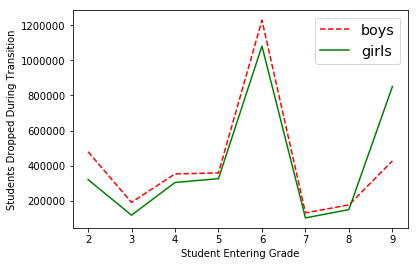

In [118]:
d_b={1:'C1_B',2:'C2_B',3:'C3_B',4:'C4_B',5:'C5_B',6:'C6_B',7:'C7_B',8:'C8_B',9:'C9_B'}
d_g={1:'C1_G',2:'C2_G',3:'C3_G',4:'C4_G',5:'C5_G',6:'C6_G',7:'C7_G',8:'C8_G',9:'C9_G'}
drops_b=[]
drops_g=[]
set1=1044
set2=1033
for i in range(0,8):
    drops_b.append(a15[d_b[i+1]].sum()-a16[d_b[i+2]].sum()-a16[d_b[i+1]+'R'].sum())
    drops_g.append(a15[d_g[i+1]].sum()-a16[d_g[i+2]].sum()-a16[d_g[i+1]+'R'].sum())
plt.plot(range(2,10),drops_b,'r--',range(2,10),drops_g,'g')
handles, labels = ax.get_legend_handles_labels()
plt.legend(['boys','girls'],fontsize="x-large")
plt.xlabel('Student Entering Grade')
plt.ylabel('Students Dropped During Transition')
plt.show()

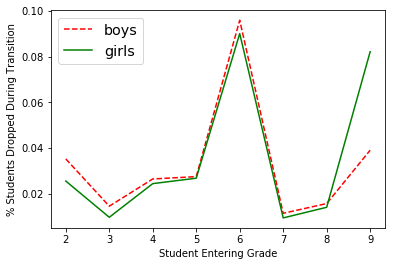

In [9]:
drp_b_a=[]
drp_g_a=[]
for i in range(0,8):
    drp_b_a.append(float(drops_b[i])/float(a15[d_b[i+1]].sum()))
    drp_g_a.append(float(drops_g[i])/float(a15[d_g[i+1]].sum()))
plt.plot(range(2,10),drp_b_a,'r--',range(2,10),drp_g_a,'g')
plt.xlabel('Student Entering Grade')
plt.ylabel('% Students Dropped During Transition')
plt.legend(['boys','girls'],fontsize="x-large")
plt.show()

In [10]:


print "Approximate percentage dropout from 1st to 9th grade: (a) Boys",np.sum(drp_b_a)*100,"(b) Girls:",np.sum(drp_b_a)*100

Approximate percentage dropout from 1st to 9th grade: (a) Boys 26.5604267387 (b) Girls: 26.5604267387


This is a bad thing as every year about 2.61 crore students enroll in 1st grade of the schools. and only about 74% of them are going to reach 9th grade is a scary situation. The number is over 70 lakh. When that much amount of population can not finish schooling, the nation is really wasting a lot of potential right there.
If this dropout rate is reduced, it will help a lot towards building a better nation.

In the next few code snippets, we will analyze the dropouts and repeaters. Then we will find the factors that can help reduce the dropout or repeaters. Repeaters are still less harmful as they do not quit school.

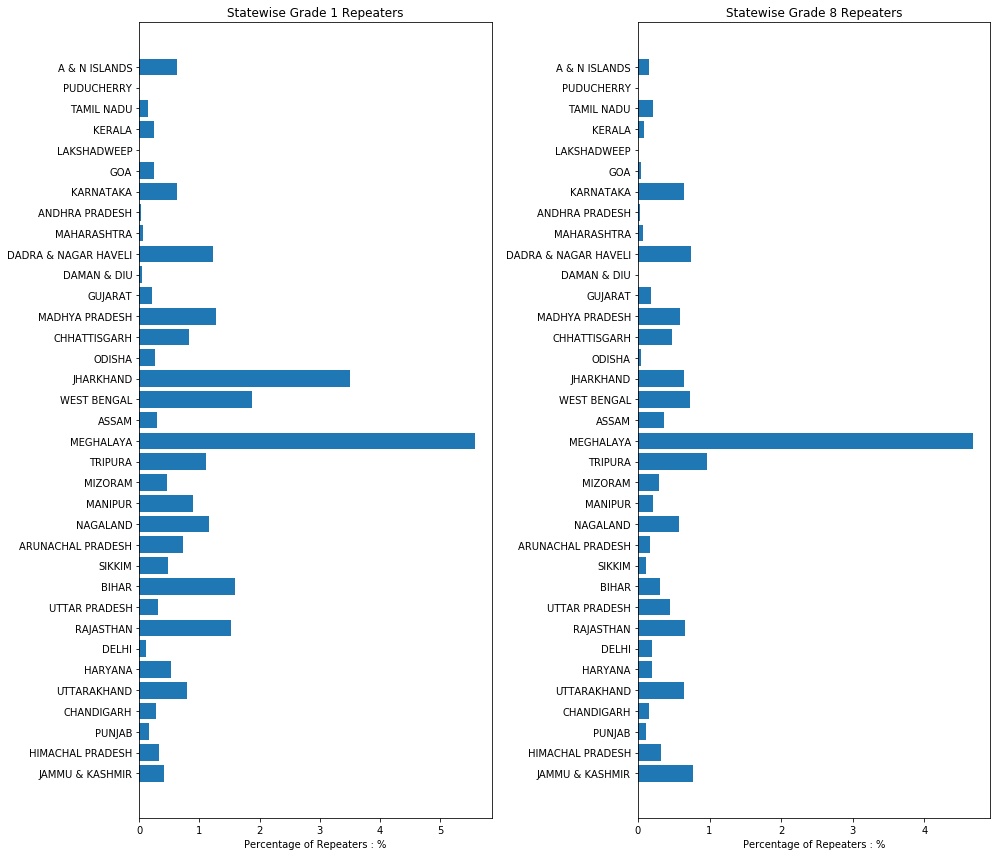

In [122]:
nos=np.unique(stats['STATCD'])
stat_n=np.unique(stats)
repeats=[]
repeats2=[]
for i in nos:
    repeats.append(100.0*float((a16[a16['STATCD']==i]['C1_BR']).sum())/float(a15[a16['STATCD']==i]['C1_B'].sum()))
    repeats2.append(100.0*float((a16[a16['STATCD']==i]['C8_BR']).sum())/float(a15[a16['STATCD']==i]['C8_B'].sum()))
is1=np.unique(stats['STATNAME'],return_index=True)
stat_n=[stats['STATNAME'][index] for index in sorted(is1[1])]
fig4, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,12))

ax1.barh(range(1,36),repeats)
ax1.set_yticks(range(1,36))
ax1.set_yticklabels(stat_n)
ax1.set_title('Statewise Grade 1 Repeaters')
ax1.set_xlabel('Percentage of Repeaters : %')
ax2.barh(range(1,36),repeats2)
ax2.set_yticks(range(1,36))
ax2.set_yticklabels(stat_n)
ax2.set_title('Statewise Grade 8 Repeaters')
ax2.set_xlabel('Percentage of Repeaters : %')
fig4.tight_layout()
plt.show()

### Analysis of Repeaters
 The plots above shows statewise representation of repeaters in that state. Most of the states have least amount of repeaters. The State Meghalaya has almost 5% of students as repeaters, whereas the states of Maharashtra, Andhra Pradesh have the least.
 
Now, one can not judge the performance of state from only this factor. The State of Maharashtra refrains from failing students till 8th grade so the lower number isn't really surprising. Also, higher number of repeaters can also be considered as a better curriculum.


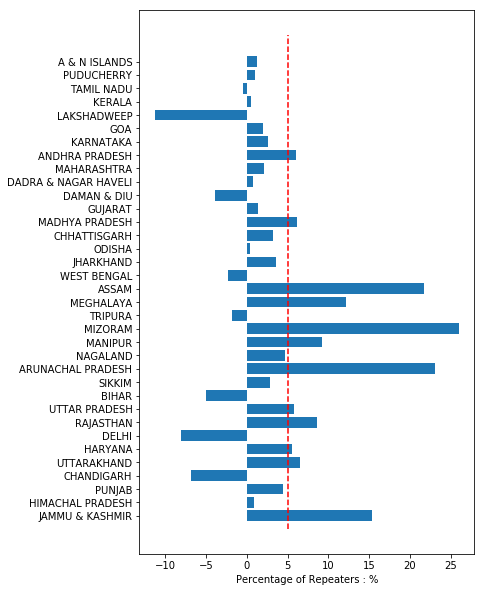

In [12]:
drops=[]
pvt_sch=[]
pub_sch=[]
for i in nos:
    drops.append(100.0*float(a15[a16['STATCD']==i]['C1_B'].sum()-a16[a16['STATCD']==i]['C1_BR'].sum()-a16[a16['STATCD']==i]['C2_B'].sum())/float(a15[a16['STATCD']==i]['C1_B'].sum()))
    pvt_sch.append(100.0*float((a16[a16['STATCD']==i]['SCHTOTP']).sum())/float(a15[a16['STATCD']==i]['SCHTOT'].sum()))
    pub_sch.append(100.0*float((a16[a16['STATCD']==i]['SCHTOTG']).sum())/float(a15[a16['STATCD']==i]['SCHTOT'].sum()))

fig6=plt.figure(figsize=(6,10))
plt.barh(range(1,36),drops)
plt.yticks(range(1,36),stat_n,rotation=0)
plt.xlabel('Percentage of Repeaters : %')
plt.plot([5,5],[0,37],'r--')
plt.show()

### Statewise Analysis of Dropouts

The above plot shows a statewise dropout rate. There are many states which shows no drop out or even a positive enrollment. Let us consider these states states with good educational support. 5% drop is the average drop and thus, anything above 5% is an anomaly. The states which shows above 5% drop needs some fix.

### The states are:
1.Jammu and Kashmir 2. Uttarakhand 3. Haryana 4. Rajasthan 5. Uttar Pradesh 6. Arunachal Pradesh 7. Manipur 8. Meghalaya 9. Assam 10. Chattisgarh 11. Andhra Pradesh

Now, except Tripura all the other states in North-East show a high dropout rate. It just tells us that the government has been ignorant about these states when considering the education. So More attention to these states is necessary.

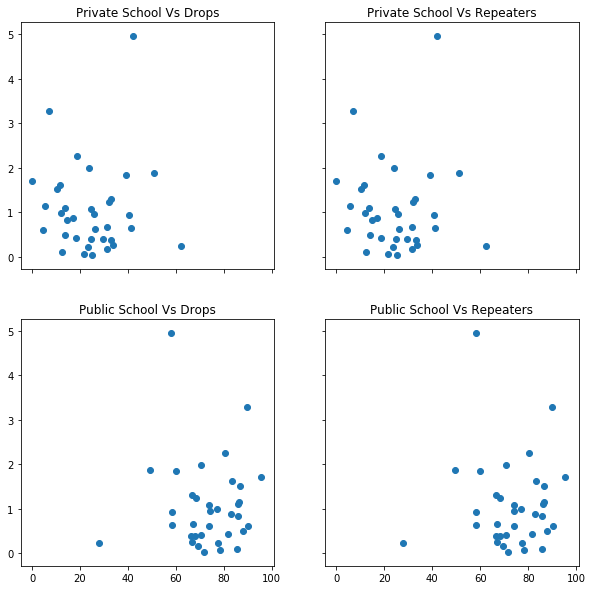

In [13]:
drops_mean_b=[]
repeat_mean_b=[]
drops_mean_g=[]
repeat_mean_g=[]
for j in range(0,len(d_b)):
    drops_mean_b_t=[]
    drops_mean_g_t=[]
    repeat_mean_b_t=[]
    repeat_mean_g_t=[]
    for i in nos:
        drops_mean_b_t.append(100.0*float(a15[a16['STATCD']==i][d_b[j+1]].sum()-a16[a16['STATCD']==i][d_b[j+1]+'R'].sum()-a16[a16['STATCD']==i][d_b[j+1]].sum())/float(a15[a16['STATCD']==i][d_b[j+1]].sum()))
        repeat_mean_b_t.append(100.0*float((a16[a16['STATCD']==i][d_b[j+1]+'R']).sum())/float(a15[a16['STATCD']==i][d_b[j+1]].sum()))
        drops_mean_g_t.append(100.0*float(a15[a16['STATCD']==i][d_g[j+1]].sum()-a16[a16['STATCD']==i][d_g[j+1]+'R'].sum()-a16[a16['STATCD']==i][d_g[j+1]].sum())/float(a15[a16['STATCD']==i][d_g[j+1]].sum()))
        repeat_mean_g_t.append(100.0*float((a16[a16['STATCD']==i][d_g[j+1]+'R']).sum())/float(a15[a16['STATCD']==i][d_g[j+1]].sum()))
    drops_mean_b.append(drops_mean_b_t)
    drops_mean_g.append(drops_mean_g_t)
    repeat_mean_b.append(repeat_mean_b_t)
    repeat_mean_g.append(repeat_mean_g_t)
    
temp=(np.array(repeat_mean_b)+np.array(repeat_mean_g))/2
mean_repeat=np.mean(temp,axis=0)
temp=(np.array(drops_mean_b)+np.array(drops_mean_g))/2
mean_drop=np.mean(temp,axis=0)
fig5, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(10,10))
ax1.scatter(pvt_sch,mean_repeat)
ax1.set_title('Private School Vs Drops')
ax2.scatter(pvt_sch, mean_repeat)
ax2.set_title('Private School Vs Repeaters')
ax3.scatter(pub_sch, mean_repeat)
ax3.set_title('Public School Vs Drops')
ax4.scatter(pub_sch, mean_repeat)
ax4.set_title('Public School Vs Repeaters')

plt.show()

### Is there a correlation between some features.
The above plots show the features plotted against one another. There is some weak correlation, both positive and negative amongst these features but it isn't really clear. We will see more about it in the later sections.

In [14]:
sclst=[]
sclsr=[]
selec=[]
tchobc=[]
tchsc=[]
tchst=[]
for i in nos:
    sclst.append(100.0*float((a16[a16['STATCD']==i]['SCLSTOT']).sum())/float(a15[a16['STATCD']==i]['SCHTOT'].sum()))
    sclsr.append(100.0*float((a16[a16['STATCD']==i]['STCHTOT']).sum())/float(a15[a16['STATCD']==i]['SCHTOT'].sum()))
    selec.append((100.0*float((a16[a16['STATCD']==i]['SELETOT']).sum())/float(a15[a16['STATCD']==i]['SCHTOT'].sum())))
    tchobc.append(100.0*float(((a16[a16['STATCD']==i][['TCHOBCF7','TCHOBCF6','TCHOBCF5','TCHOBCF4','TCHOBCF3','TCHOBCF2','TCHOBCF1','TCHOBCM1','TCHOBCM2','TCHOBCM3','TCHOBCM4','TCHOBCM5','TCHOBCM6','TCHOBCM7']].sum()).sum())/float(a15[a16['STATCD']==i]['TCHTOT'].sum())))
    tchsc.append(100.0*float(((a16[a16['STATCD']==i][['TCHSTF7','TCHSTF6','TCHSTF5','TCHSTF4','TCHSTF3','TCHSTF2','TCHSTF1','TCHSTM1','TCHSTM2','TCHSTM3','TCHSTM4','TCHSTM5','TCHSTM6','TCHSTM7']].sum()).sum())/float(a15[a16['STATCD']==i]['TCHTOT'].sum())))
    tchst.append(100.0*float(((a16[a16['STATCD']==i][['TCHSCF7','TCHSCF6','TCHSCF5','TCHSCF4','TCHSCF3','TCHSCF2','TCHSCF1','TCHSCM1','TCHSCM2','TCHSCM3','TCHSCM4','TCHSCM5','TCHSCM6','TCHSCM7']].sum()).sum())/float(a15[a16['STATCD']==i]['TCHTOT'].sum())))

## Caste wise Distribution of teachers
The plots below show percentage of caste wise teachers populations in each state. The North Eastern states have most SC teachers. But other states have almost no SC teachers. SC population in India is 16.6% but the same amount in teachers is not there. The ST population though represents the national average. 41% OBC population is also not being represented in the teacher population. These factors may or may not represent the Dropout rates. We will see more lateer

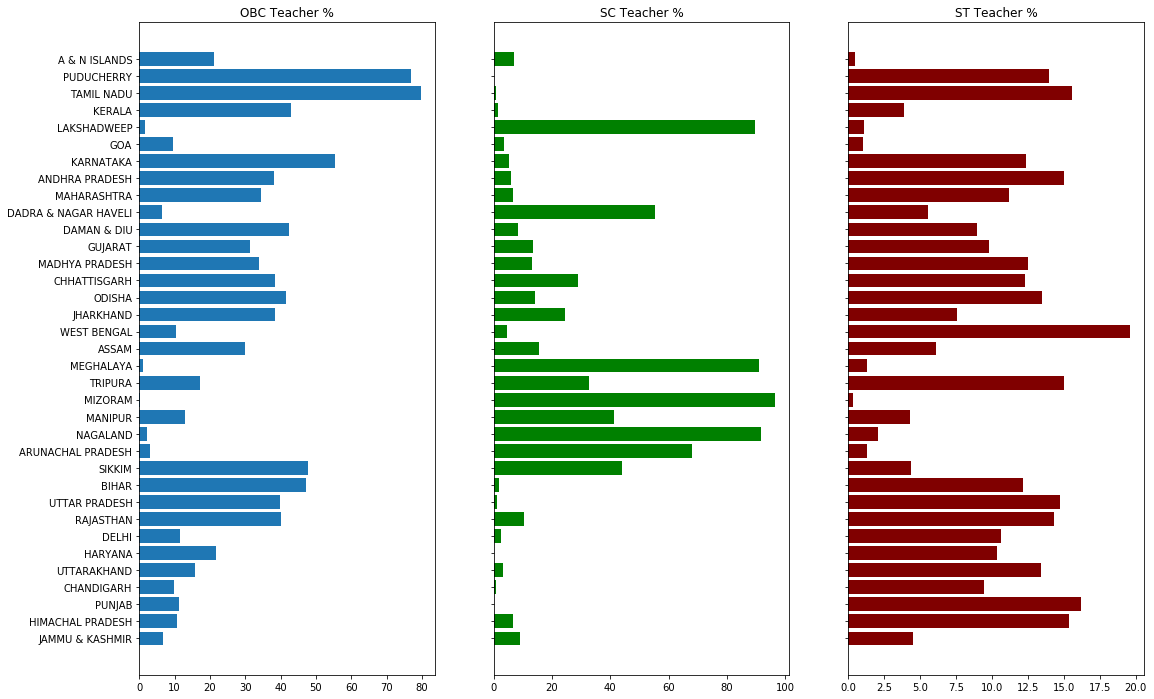

In [15]:

fig6, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,12),sharey=True)
ax1.barh(range(1,36),tchobc)
ax1.set_yticks(range(1,36))
ax1.set_yticklabels(stat_n)
ax1.set_title('OBC Teacher %')
ax2.barh(range(1,36),tchsc,color='green')
ax2.set_title('SC Teacher %')
ax3.barh(range(1,36),tchst,color='maroon')
ax3.set_title('ST Teacher %')
plt.show()

## Correlation of Drops with Caste

From the plots below it is seen that there is no correlation between Caste and the Dropouts and Repeaters. Thus, the Caste Representation can be improved without hindering the results.

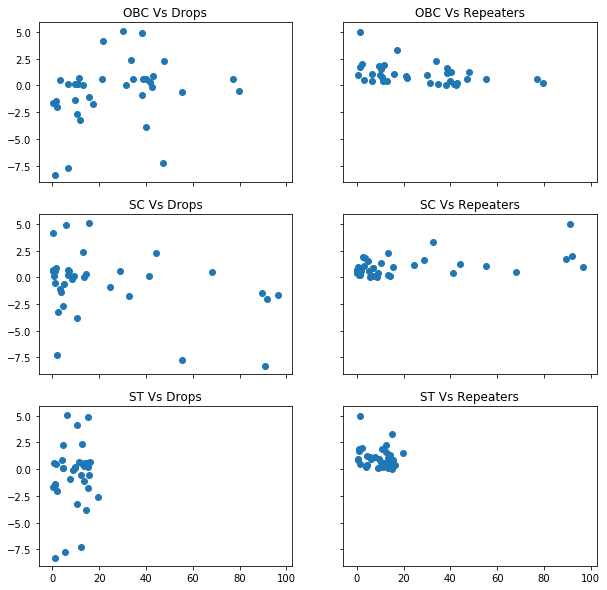

In [124]:
fig7, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3, 2, sharex='col', sharey='row',figsize=(10,10))
ax1.scatter(tchobc,mean_drop)
ax1.set_title('OBC Vs Drops')
ax2.scatter(tchobc, mean_repeat)
ax2.set_title('OBC Vs Repeaters')
ax3.scatter(tchsc, mean_drop)
ax3.set_title('SC Vs Drops')
ax4.scatter(tchsc, mean_repeat)
ax4.set_title('SC Vs Repeaters')
ax5.scatter(tchst, mean_drop)
ax5.set_title('ST Vs Drops')
ax6.scatter(tchst, mean_repeat)
ax6.set_title('ST Vs Repeaters')

plt.show()

Here we will scrap some more features including mid day meal, ramps, computers, electricity etc to see how these affects the results. Then we will implement a bunch of functions to analyze the data.

In [17]:
sgtoil=[]
sbtoil=[]
swat=[]
splay=[]
swall=[]
sroad=[]
scomp=[]
sramp=[]
smeal=[]
for i in nos:
    smeal.append(100.0*float((a16[a16['STATCD']==i]['MDMTOT']).sum())/float(a15[a16['STATCD']==i]['SCHTOT'].sum()))
    sramp.append(100.0*float((a16[a16['STATCD']==i]['SRAMTOT']).sum())/float(a15[a16['STATCD']==i]['SCHTOT'].sum()))
    scomp.append((100.0*float((a16[a16['STATCD']==i]['SCOMPTOT']).sum())/float(a15[a16['STATCD']==i]['SCHTOT'].sum())))
    sroad.append((100.0*float((a16[a16['STATCD']==i]['ROADTOT']).sum())/float(a15[a16['STATCD']==i]['SCHTOT'].sum())))
    swall.append((100.0*float((a16[a16['STATCD']==i]['SBNDRTOT']).sum())/float(a15[a16['STATCD']==i]['SCHTOT'].sum())))
    splay.append((100.0*float((a16[a16['STATCD']==i]['SPLAYTOT']).sum())/float(a15[a16['STATCD']==i]['SCHTOT'].sum())))
    swat.append((100.0*float((a16[a16['STATCD']==i]['SWATTOT']).sum())/float(a15[a16['STATCD']==i]['SCHTOT'].sum())))
    sbtoil.append((100.0*float((a16[a16['STATCD']==i]['SBTOILTOT']).sum())/float(a15[a16['STATCD']==i]['SCHTOT'].sum())))
    sgtoil.append((100.0*float((a16[a16['STATCD']==i]['SGTOILTOT']).sum())/float(a15[a16['STATCD']==i]['SCHTOT'].sum())))

In [73]:
def filter_data(data, condition):

    field=condition[0]
    op=condition[1]
    value = condition[2]
    
    # convert value into number or strip excess quotes if string
    try:
        value = float(value)
    except:
        value = value.strip("\'\"")
    
    # get booleans for filtering
    if op == ">":
        matches = data[field] > value
    elif op == "<":
        matches = data[field] < value
    elif op == ">=":
        matches = data[field] >= value
    elif op == "<=":
        matches = data[field] <= value
    elif op == "==":
        matches = data[field] == value
    elif op == "!=":
        matches = data[field] != value
    else: # catch invalid operation codes
        raise Exception("Invalid comparison operator. Only >, <, >=, <=, ==, != allowed.")
    
    # filter data and outcomes
    data = data[matches].reset_index(drop = True)
    return data

def drop_stats(data, outcomes, key, filters = []):
    
    # Check that the key exists
    if key not in data.columns.values :
        print "'{}' is not a feature of the data. Did you spell something wrong?".format(key)
        return False

    # Return the function before visualizing if 'Cabin' or 'Ticket'
    # is selected: too many unique categories to display
    # Merge data and outcomes into single dataframe
    all_data = pd.concat([data, outcomes], axis = 1)
    
    # Apply filters to data
    for condition in filters:
        all_data = filter_data(all_data, condition)

    # Create outcomes DataFrame
    all_data = all_data[[key, 'has_dropped']]
    
    # Create plotting figure
    plt.figure(figsize=(8,6))

    # 'Numerical' features
    if True:
        
        # Remove NaN values from Age data
        all_data = all_data[~np.isnan(all_data[key])]
        
        # Divide the range of data into bins and count survival rates
        min_value = all_data[key].min()
        max_value = all_data[key].max()
        value_range = max_value - min_value

        # 'Fares' has larger range of values than 'Age' so create more bins
        
        # Overlay each bin's survival rates
        nonsurv_vals = all_data[all_data['has_dropped'] == 0][key].reset_index(drop = True)
        surv_vals = all_data[all_data['has_dropped'] == 1][key].reset_index(drop = True)
        plt.hist(nonsurv_vals, alpha = 0.6,
                 color = 'red', label = 'Droppers')
        plt.hist(surv_vals,alpha = 0.6,
                 color = 'green', label = 'No Drops')
    
        # Add legend to plot
        #plt.xlim(0, bins.max())
        plt.legend(framealpha = 0.8)
    
    # 'Categorical' features)

    # Common attributes for plot formatting
    plt.xlabel(key)
    plt.ylabel('Number of States')
    plt.title('Chance of dropout with \'%s\' Feature'%(key))
    plt.show()

def repeat_stats(data, outcomes, key, filters = []):
    
    # Check that the key exists
    if key not in data.columns.values :
        print "'{}' is not a feature of the data. Did you spell something wrong?".format(key)
        return False

    # Return the function before visualizing if 'Cabin' or 'Ticket'
    # is selected: too many unique categories to display
    # Merge data and outcomes into single dataframe
    all_data = pd.concat([data, outcomes], axis = 1)
    
    # Apply filters to data
    for condition in filters:
        all_data = filter_data(all_data, condition)

    # Create outcomes DataFrame
    all_data = all_data[[key, 'higher_repeat?']]
    
    # Create plotting figure
    plt.figure(figsize=(8,6))

    # 'Numerical' features
    if True:
        
        # Remove NaN values from Age data
        all_data = all_data[~np.isnan(all_data[key])]
        
        # Divide the range of data into bins and count survival rates
        min_value = all_data[key].min()
        max_value = all_data[key].max()
        value_range = max_value - min_value

        # 'Fares' has larger range of values than 'Age' so create more bins
        
        # Overlay each bin's survival rates
        nonsurv_vals = all_data[all_data['higher_repeat?'] == 0][key].reset_index(drop = True)
        surv_vals = all_data[all_data['higher_repeat?'] == 1][key].reset_index(drop = True)
        plt.hist(nonsurv_vals, alpha = 0.6,
                 color = 'red', label = 'High Repeaters')
        plt.hist(surv_vals, alpha = 0.6,
                 color = 'green', label = 'Low Repeaters')
    
        # Add legend to plot
        #plt.xlim(0, bins.max())
        plt.legend(framealpha = 0.8)
    
    # 'Categorical' features)

    # Common attributes for plot formatting
    plt.xlabel(key)
    plt.ylabel('Number of States')
    plt.title('Chance of Repeat with \'%s\' Feature'%(key))
    plt.show()


In [125]:
Xdata={'drops_avg':mean_drop,'repeat_avg':mean_repeat,'private':pvt_sch,'public':pub_sch,'single_teac':sclst,'single_room':sclsr,'electricity':selec,'obc':tchobc,'sc':tchsc,'st':tchst,'meal':smeal,'ramp':sramp,'computer':scomp,'road':sroad,'wall':swall,'playground':splay,'water':swat,'girl_toil':sgtoil,'boy_toil':sbtoil}
temp=([x > 1 for x in repeats])
drop_true=np.multiply(temp,1)
temp=([x > 5 for x in drops])
repeat_true=np.multiply(temp,1)
out_f=pd.DataFrame({'has_dropped':drop_true,'higher_repeat?':repeat_true})
X_few=pd.DataFrame(Xdata)

## Comparison of other factors
The plot below shows the highest drop outs have occured even with 100% Electrified Schools though lower electrified states have lower dropouts.

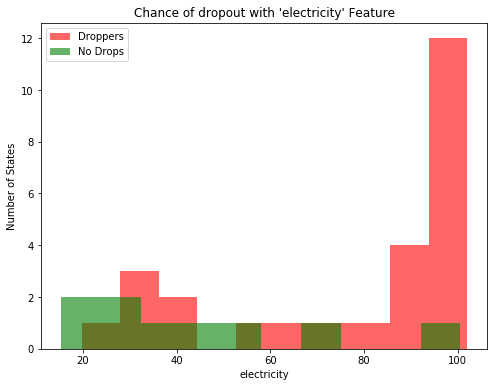

In [126]:
drop_stats(X_few,out_f['has_dropped'],'electricity')

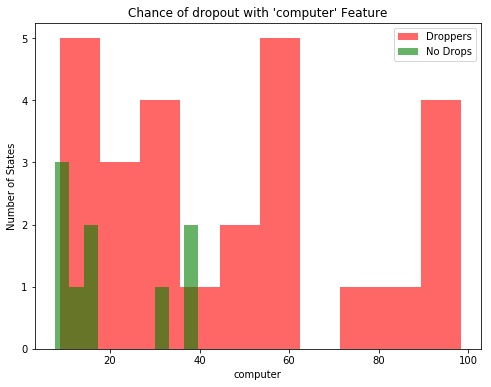

In [127]:
drop_stats(X_few,out_f['has_dropped'],'computer')

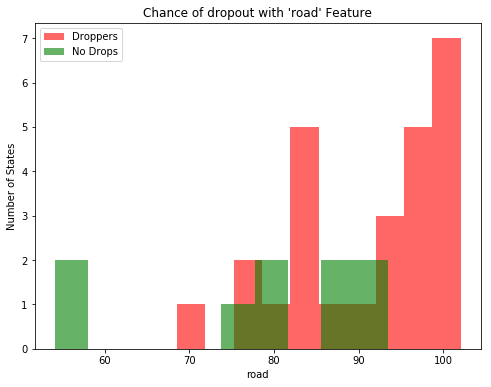

In [135]:
drop_stats(X_few,out_f['has_dropped'],'road')

## Progressive Facilities do not help Dropout
The states which had low electrification, low computers, schools without roads still have lower drops than the schools which had all of these good. So funding more in these facilities is not going to help reduce the dropouts.

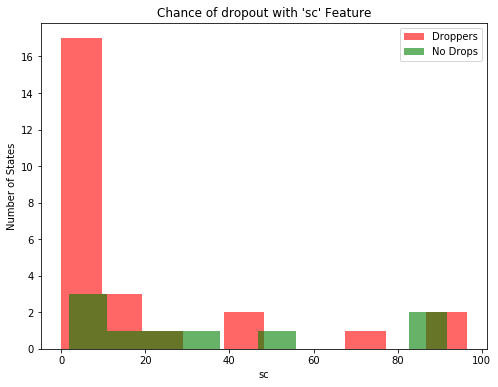

In [136]:
drop_stats(X_few,out_f['has_dropped'],'sc')

The plot above show the Schools with Lowest SC Teachers have highest amount of Dropout Rates. 

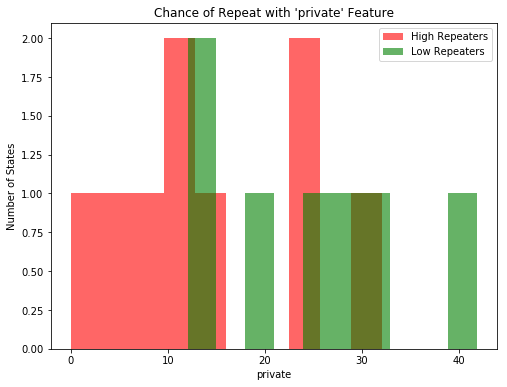

In [143]:
repeat_stats(X_few,out_f['higher_repeat?'],'private',[['sc','>=',10]])

Coming to the Private schools, the states which hav more private schools and also more SC teachers, the Dropout rate is low.

Coming to the Private schools, the states which hav more private schools and also more SC teachers, the Repeater rate is low. The same trend is not observed with OBC's and ST's.

## Conclusions and Suggestions

The following things can be improved if schools has to be improved both socially and with quality.

1. Dropouts is an important issue. 30% Population is out of the schooling system and the important man power is being wasted.

2. The factors that government has been doing such as Mid-day meal, electrification are good things but are not enough to reduce the dropouts or repeaters. The other factors must be researched to reduce these problems.

3. The states which are not performing well are from North East and Kashmir. North East has been ignored by government most of the time. More attention has to be given to these states.

4. The caste wise distribution of Teachers does not represent the actual population representation in most cases and thus this balance has to be re-established. The Caste is not having any direct correlation with the performance and thus it is safe to use some work to balance out these things. On the other hand, the states with higher dropout has least number of SC teachers. Fixing that is a necessity.

*Note: The regression analysis was not completed due to lack of time. Though it is possible to find an equation to correlate these features with the dropout rate.*